# Key and Tokens

In [418]:
# consumer_key = "hg3XDytH1Ug99mRJJ707xXSqO"
# consumer_secret = "YXkAYpz2jsz5qcOy7hcXjBX9t7WhU87MzqpRnOm2gmjucQWyJf"
# auth = tweepy.OAuthHandler(consumer_key, consumer_secret)
# auth.set_access_token("1361934119194685443-Cb0bDxeBpGsDMWeFkm03y0WkNlWLpY", "ssXVWzFScAaOp7olfmygJuFh9imO2AW6TyY3MnIrRALOQ")
# api = tweepy.API(auth, wait_on_rate_limit=True)

time: 1.93 ms (started: 2022-06-30 17:01:59 +00:00)


# Fetch Data

In [419]:
# query = "-is:retweet"
# query = "metaverse filter:retweets"
# query = "-filter:retweets"
# query = "from:jokowi filter:verified"
# query = "filter:verified exclude:replies exclude:retweets"

time: 1.57 ms (started: 2022-06-30 17:02:00 +00:00)


In [420]:
# tweets = tweepy.Cursor(
#                         api.search,
#                         # id="nsasono",
#                         # id="budiraharjo",
#                         q=query,
#                         lang="en",
# #                        since='2022-04-23T00:00:00Z', tanggal 23 allday
#                         since='2022-05-07T00:00:00Z',
#                         until='2022-05-08T00:00:00Z'
#                         ).items(2500)

time: 6.74 ms (started: 2022-06-30 17:02:00 +00:00)


In [421]:
# tweets_copy = []
# for tweet in tweets:
#   tweets_copy.append(tweet)
# print("Total tweets fetched: ",len(tweets_copy))

time: 8.55 ms (started: 2022-06-30 17:02:00 +00:00)


In [422]:
# # intialize the dataframe
# tweets_df = pd.DataFrame()

# # populate the dataframe
# for tweet in tweets_copy:
#     hashtags = []
#     try:
#         for hashtag in tweet.entities["hashtags"]:
#             hashtags.append(hashtag["text"])
#         text = api.get_status(id=tweet.id, tweet_mode='extended').full_text
#     except:
#         pass
#     tweets_df = tweets_df.append(pd.DataFrame({'user_name': tweet.user.name, 
#                                                'user_location': tweet.user.location,
#                                                'user_description': tweet.user.description,
#                                                'user_verified': tweet.user.verified,
#                                                'date': tweet.created_at,
#                                                'text': text, 
#                                                'hashtags': [hashtags if hashtags else None],
#                                                'source': tweet.source}))
#     tweets_df = tweets_df.reset_index(drop=True)

# # show the dataframe
# tweets_df.head()

time: 4.57 ms (started: 2022-06-30 17:02:00 +00:00)


In [423]:
# tweets_df.to_csv('/content/drive/My Drive/pimo/dataset/Tweets-2022-05-07.csv')

time: 1.99 ms (started: 2022-06-30 17:02:00 +00:00)


# Merge Datasets

In [424]:
# path = "/content/drive/My Drive/pimo/dataset/"
# allFiles = glob.glob(path + "/data*.csv")
# list_ = []

# for file_ in allFiles:
#     df = pd.read_csv(file_,lineterminator='\n')
#     list_.append(df)
# df = pd.concat(list_)
# df = df.iloc[: , 1:] # remove first column
# df

time: 1.8 ms (started: 2022-06-30 17:02:00 +00:00)


# Library

In [425]:
!pip install gensim
!pip install wordcloud
!pip install pyLDAvis
!pip install contractions
!pip install ipython-autotime
%load_ext autotime

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
The autotime extension is already loaded. To reload it, use:
  %reload_ext autotime
time: 17.7 s (started: 2022-06-30 17:02:00 +00:00)


In [426]:
import tweepy
import pandas as pd
import json
import csv
import string
import os
import time
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import re
import collections
import datetime

import gensim
import gensim.corpora as corpora
from gensim.utils import simple_preprocess
from gensim.parsing.preprocessing import STOPWORDS
from gensim.models import CoherenceModel
from gensim import corpora, models
from pprint import pprint


from nltk.stem import WordNetLemmatizer, SnowballStemmer
from nltk.stem.porter import *
import numpy as np
np.random.seed(2018)

import nltk
nltk.download('wordnet')
nltk.download('omw-1.4')

import matplotlib.pyplot as pPlot
import seaborn as sb
from wordcloud import WordCloud, STOPWORDS
from PIL import Image
import matplotlib.colors as mcolors
from sklearn.feature_extraction.text import CountVectorizer

from sklearn.decomposition import LatentDirichletAllocation
import pyLDAvis
import pyLDAvis.sklearn

import glob
import contractions

time: 166 ms (started: 2022-06-30 17:02:18 +00:00)


[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package omw-1.4 to /root/nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!


Mount Google Drive

In [427]:
from google.colab import drive
drive.mount('/content/drive', force_remount=True)

Mounted at /content/drive
time: 3.76 s (started: 2022-06-30 17:02:18 +00:00)


# Datasets

In [428]:
path = "/content/drive/My Drive/pimo/dataset/"
allFiles = glob.glob(path + "/data*.csv")
list_ = []

for file_ in allFiles:
    df = pd.read_csv(file_,lineterminator='\n', parse_dates=['date'])
    list_.append(df)
df = pd.concat(list_)
df = df.iloc[: , 1:] # remove first column
df

,user_name,user_location,user_description,user_verified,date,text,hashtags,source,cleaned_text,lang
0,YÜKSELİM🌸,NaN,NaN,False,2022-03-23 17:46:45,@kafa10milyon500 Miray88,NaN,Twitter for Android,NaN,NaN
1,MR.BROKER,NaN,Insurance Broker /Specialist protection advise...,False,2022-03-23 17:46:45,This tune 🔥🔥 https://t.co/D4ruGgLWDj,NaN,Twitter for iPhone,NaN,NaN
2,Arslan 🚀,Shadow Moses Island,I will one day conquer the digital space with ...,False,2022-03-23 17:46:45,Y’all know a movie is a banger when it starts ...,NaN,Twitter for iPhone,NaN,NaN
3,☾︎𝑉𝑖𝑡𝑜𝑟𝑖𝑎⁷ 𝘫𝘪𝘮𝘪𝘯 𝘰𝘴𝘵 ✈︎,NaN,https://t.co/uXrU2ca4aC,False,2022-03-23 17:46:45,@jiminsbybaby #ChristmasTree - #V_ChristmasTre...,"['ChristmasTree', 'V_ChristmasTree', 'V']",Twitter for Android,NaN,NaN
4,Boxish,NaN,I wanna eat you | I make vtuber clips sometime...,False,2022-03-23 17:46:45,@Alpharad @PointCrow Is he gonna speedrun a date?,NaN,Twitter for iPhone,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...
1566,Etheria-chan,"Not Advice, DYOR",Artist. Lead dev. Ex-infosec. Anime girl enjoy...,False,2022-05-08 23:59:56,@inversebrah @TheBaphie get him,NaN,Twitter for Android,NaN,NaN
1567,kirin haruna 🦒,NaN,"i'm kirin, lazy giraffe and idol in training! ...",False,2022-05-08 23:59:56,she loves cars i think! https://t.co/oQnpEliNw6,NaN,Twitter for Android,NaN,NaN
1568,Eileen Clancy,NaN,Big hard questions | Scholarly infrastructure ...,False,2022-05-08 23:59:56,People show up in person to demonstrations bec...,NaN,Twitter Web App,NaN,NaN
1569,manyea,here,i make music sorta,False,2022-05-08 23:59:56,ngl having my name as my username kinda a W 🚶🏿‍♂️,NaN,Twitter for iPhone,NaN,NaN


time: 776 ms (started: 2022-06-30 17:02:22 +00:00)


# Preprocessing

Expand Contraction

In [429]:
contractions_dict = {"ain't": "are not","'s":" is","aren't": "are not","don't": "do not"}
# Regular expression for finding contractions
contractions_re=re.compile('(%s)' % '|'.join(contractions_dict.keys()))
def expand_contractions(text,contractions_dict=contractions_dict):
    def replace(match):
        return contractions_dict[match.group(0)]
    return contractions_re.sub(replace, text)

time: 3.64 ms (started: 2022-06-30 17:02:23 +00:00)


Remove Duplicates Value

In [430]:
def remove_duplicates(df):
    # dropping all duplicates value 
    df.drop_duplicates(subset ="text", 
                         keep = False, inplace = True) 
    return df

time: 2.53 ms (started: 2022-06-30 17:02:23 +00:00)


Remove 2 Words Tweets

In [431]:
def remove_2_words_tweet(df):
    df = df['text'].apply(lambda x:np.NaN if len(x)<=2 else x)
    return df

time: 2.67 ms (started: 2022-06-30 17:02:23 +00:00)


Remove Punctuations

In [432]:
def removing_punctuations(tweets_txt):
    puntuation_filtered_txt = tweets_txt.translate(str.maketrans("","",string.punctuation))
    return puntuation_filtered_txt

time: 2.61 ms (started: 2022-06-30 17:02:23 +00:00)


Remove Numbers

In [433]:
def remove_numbers(tweets_txt):
    pattern = r"\d+"
    number_filter_txt = re.sub(pattern,"",tweets_txt)
    return number_filter_txt

time: 2.39 ms (started: 2022-06-30 17:02:23 +00:00)


## Cleaning Data

In [434]:
df['text']=df['text'].apply(lambda x:expand_contractions(x))

time: 183 ms (started: 2022-06-30 17:02:23 +00:00)


In [435]:
df=remove_duplicates(df)

time: 117 ms (started: 2022-06-30 17:02:23 +00:00)


In [436]:
df['text']=df.apply(lambda x: removing_punctuations(x['text']),axis=1)

time: 1.15 s (started: 2022-06-30 17:02:23 +00:00)


In [437]:
df['text']=df.apply(lambda x: remove_numbers(x['text']),axis=1)

time: 1.08 s (started: 2022-06-30 17:02:24 +00:00)


In [438]:
df.head()

,user_name,user_location,user_description,user_verified,date,text,hashtags,source,cleaned_text,lang
0,angel,NaN,"stupid,amma snake",False,2022-03-27 12:59:53,I just want your lips,NaN,Twitter for Android,NaN,NaN
1,Ickiest Vicky♈️🤩,NaN,IG: l.aysjaaa // Laiah’s Mommy 💗🦋 | just tryn...,False,2022-03-27 12:59:53,I can actually feel just that 😩 my hunny is so...,NaN,Twitter for iPhone,NaN,NaN
2,sajjad raza,United Kingdom,NaN,False,2022-03-27 12:59:53,ShahZainBugti lakh lanat tairy tay,NaN,Twitter for iPhone,NaN,NaN
3,elenù✨,NaN,♒,False,2022-03-27 12:59:53,brooklynabooo gretaxnic SAY IT LOUDER,NaN,Twitter for Android,NaN,NaN
4,Joey,NaN,🔞,False,2022-03-27 12:59:53,victorykn fbfsubstack PrisonPlanet Next stop G...,NaN,Twitter Web App,NaN,NaN


time: 18.4 ms (started: 2022-06-30 17:02:25 +00:00)


In [439]:
df['text']=remove_2_words_tweet(df)

time: 26.8 ms (started: 2022-06-30 17:02:25 +00:00)


In [440]:
df.head()

,user_name,user_location,user_description,user_verified,date,text,hashtags,source,cleaned_text,lang
0,angel,NaN,"stupid,amma snake",False,2022-03-27 12:59:53,I just want your lips,NaN,Twitter for Android,NaN,NaN
1,Ickiest Vicky♈️🤩,NaN,IG: l.aysjaaa // Laiah’s Mommy 💗🦋 | just tryn...,False,2022-03-27 12:59:53,I can actually feel just that 😩 my hunny is so...,NaN,Twitter for iPhone,NaN,NaN
2,sajjad raza,United Kingdom,NaN,False,2022-03-27 12:59:53,ShahZainBugti lakh lanat tairy tay,NaN,Twitter for iPhone,NaN,NaN
3,elenù✨,NaN,♒,False,2022-03-27 12:59:53,brooklynabooo gretaxnic SAY IT LOUDER,NaN,Twitter for Android,NaN,NaN
4,Joey,NaN,🔞,False,2022-03-27 12:59:53,victorykn fbfsubstack PrisonPlanet Next stop G...,NaN,Twitter Web App,NaN,NaN


time: 20.4 ms (started: 2022-06-30 17:02:25 +00:00)


# Data Visualization

In [441]:
df.sort_values(by=["date"], inplace=True, ascending=False)
df

,user_name,user_location,user_description,user_verified,date,text,hashtags,source,cleaned_text,lang
136,Dalton Miller,NaN,I write about football @pfn365 during the day....,False,2022-05-08 23:59:59,ayroned As I always say,NaN,TweetDeck,NaN,NaN
272,Synkitty (enablednft.ᴺᶠᵀ),"Imagination, Aus","Mum, Artist, Lion-maned Rainbow Lover with var...",False,2022-05-08 23:59:59,KCBCNFT You too you are an awesome mum and can...,NaN,Twitter for Android,NaN,NaN
282,𝐧𝐮𝐥𝐥 𝐩𝐨𝐢𝐧𝐭𝐞𝐫 𝐞𝐱𝐜𝐞𝐩𝐭𝐢𝐨𝐧,NaN,*𝚁𝚊𝚍𝚒𝚘 𝚜𝚝𝚊𝚝𝚒𝚌.* | 𝙿𝚘𝚜𝚝𝚜 𝚎𝚟𝚎𝚛𝚢 𝟹𝟶 𝚖𝚒𝚗𝚞𝚝𝚎𝚜. | 𝙸𝚌...,False,2022-05-08 23:59:59,Id have liked to see you rot in jail but now I...,NaN,"Cheap Bots, Done Quick!",NaN,NaN
281,kaz.,NaN,looking for mutuals!,False,2022-05-08 23:59:59,i love her httpstcoDkFrAgE,NaN,Twitter for Android,NaN,NaN
280,DeFi Sniper,DeFi,We tweet when important trades happen in DeFi ...,False,2022-05-08 23:59:59,🟢 Swapped K in WETH for stETH on x ✖\n\n🐋 M xb...,NaN,DeFiSniper,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...
2324,tas,NaN,Independent consultant. Interests are economic...,False,2022-03-27 12:59:48,HaggisUK Plebs don’t need to be educated tory,['tory'],Twitter for iPhone,NaN,NaN
2325,crickaddict45,unknown,proud 🇮🇳 & 🕉️ \nजय श्री राम :🚩 ...,False,2022-03-27 12:59:48,prateak But bumrah became thampi what about th...,NaN,Twitter for Android,NaN,NaN
2326,RushdiOmar othman,المملكة الأردنية الهاشمية,احمل شهادة المحاسبه دبلوم واعمل في مجال التصام...,False,2022-03-27 12:59:48,Zero Help me please httpstcoprihphnzlm,NaN,Twitter for Android,NaN,NaN
2327,Rhys Thomas,"England, United Kingdom","Born in Oz,raised in Wales,lost in England.\nF...",False,2022-03-27 12:59:48,DRMHelmets GMM just in case you havent already...,NaN,Twitter for Android,NaN,NaN


time: 42.9 ms (started: 2022-06-30 17:02:25 +00:00)


Plot Frequency of Tweets

In [442]:
def plot_freq(df,name):
    tweet_df_freq = df.groupby(pd.Grouper(key='date', freq=None)).size()
    tweet_df_freq.plot(figsize=(10,5))
    plt.ylabel('Number of Observations', fontsize=12)
    plt.xlabel('Date', fontsize=12)
    plt.title("Tweet Freq. of "+name, fontsize=14)
    plt.grid(True)

time: 7.33 ms (started: 2022-06-30 17:02:25 +00:00)


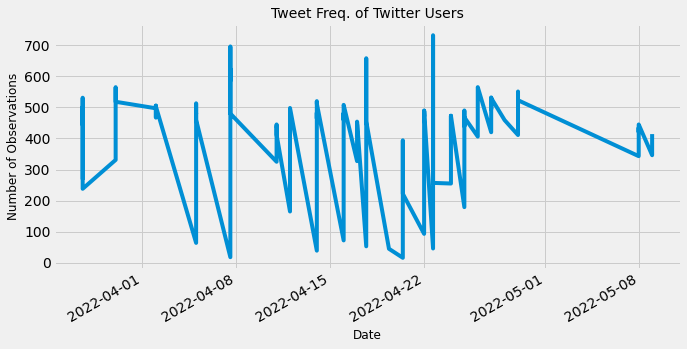

time: 243 ms (started: 2022-06-30 17:02:25 +00:00)


In [443]:
plot_freq(df, 'Twitter Users')

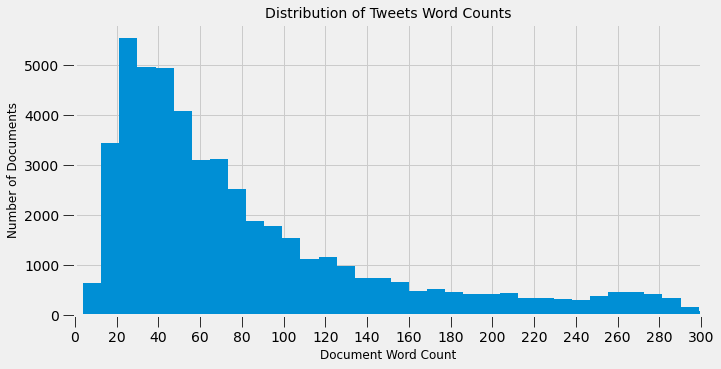

time: 374 ms (started: 2022-06-30 17:02:26 +00:00)


In [444]:
doc_lens = [len(d) for d in df.text]

plt.figure(figsize=(10,5))
plt.hist(doc_lens, bins = 100)

plt.gca().set(xlim=(0, 300), ylabel='Number of Observations', xlabel='Document Word Count')
plt.xlim(0,300)
plt.ylabel('Number of Documents', fontsize=12)
plt.xlabel('Document Word Count', fontsize=12)
plt.tick_params(size=12)
plt.xticks(np.linspace(0,300,16))
plt.title('Distribution of Tweets Word Counts', fontdict=dict(size=14))
plt.show()

In [445]:
data_text = pd.DataFrame()
data_text['text'] = df['text']
data_text['index'] = data_text.index
documents = data_text

time: 26.3 ms (started: 2022-06-30 17:02:26 +00:00)


In [446]:
print(len(documents))
print(documents[:5])

49590
                                                  text  index
136                            ayroned As I always say    136
272  KCBCNFT You too you are an awesome mum and can...    272
282  Id have liked to see you rot in jail but now I...    282
281                         i love her httpstcoDkFrAgE    281
280  🟢 Swapped K in WETH for stETH on x ✖\n\n🐋 M xb...    280
time: 9.79 ms (started: 2022-06-30 17:02:26 +00:00)


# Cleaning Tweets

In [447]:
from gensim.parsing.preprocessing import STOPWORDS
my_stop_words = STOPWORDS.union(set([
                                     'according', 'accordingly', 'across', 'act', 'actually', 'like', 'talk', 'want', 'caus',
                                     'play', 'damn', 'mean', 'love', 'gotta', 'awesom', 'song', 'annoy', 'like', 'wordl', 'good',
                                     'right', 'like', 'feel', 'come', 'say', 'time', 'go', 'good', 'okay', 'night', 'sorri', 'exact',
                                     'sure', 'stream', 'live', 'funni', 'cri', 'yeah', 'miss', 'look', 'know', 'hair', 'girl',
                                     'fine', 'guy', 'fact', 'sick', 'peopl', 'glad', 'nice', 'miss', 'friend', 'wait', 'help', 'start',
                                     'fuck', 'suck', 'need', 'today', 'tommorrow', 'yesterday', 'last', 'think', 'bore', 'walk', 'wish', 'luck',
                                     'real', 'yall', 'sorri', 'great', 'minut', 'true', 'false', 'babi', 'battl', 'this', 'that', 'those',
                                     'end', 'exact', 'wrong', 'right', 'thank', 'say', 'badg', 'annoy', 'boy', 'lmao', 'see', 'boy', 'girl'
                                     ]))

time: 10.4 ms (started: 2022-06-30 17:02:26 +00:00)


In [448]:
def lemmatize_stemming(text):
    snowballStemm_ = SnowballStemmer(language='english')
    return snowballStemm_.stem(WordNetLemmatizer().lemmatize(text, pos='v'))

def preprocess(text):
    result = []
    for token in gensim.utils.simple_preprocess(text):
        if token not in my_stop_words and len(token) > 3:
            result.append(lemmatize_stemming(token))
    return result

time: 4.74 ms (started: 2022-06-30 17:02:26 +00:00)


In [449]:
doc_sample = documents[documents.index == 1].values[0][0]
print('Original Document: ')
words = []
for word in doc_sample.split(' '):
    words.append(word)
print(words)
print('\n\n Tokenized and Lemmatized Document: ')
print(preprocess(doc_sample))

Original Document: 
['CarterNovaX', 'MY', 'CARTER', 'I', 'LOVE', 'U', 'TOO', 'p', 'lt']


 Tokenized and Lemmatized Document: 
['carternovax', 'carter']
time: 10.1 ms (started: 2022-06-30 17:02:26 +00:00)


In [450]:
processed_docs = documents['text'].apply(preprocess)
processed_docs[:10]

136                                              [ayron]
272                       [kcbcnft, awesom, mint, close]
282    [like, jail, deal, punish, faintest, chanc, sa...
281                                     [httpstcodkfrag]
280           [swap, weth, steth, xbce, httpstcofqexkhg]
279                             [pretti, sunday, funday]
278    [check, fisher, price, love, famili, dollhous,...
277                           [empressbat, excit, watch]
276                              [uguubear, uguu, beari]
275                              [cute, scroll, fpsvein]
Name: text, dtype: object

time: 18.3 s (started: 2022-06-30 17:02:26 +00:00)


Bag of Words

In [451]:
dictionary = gensim.corpora.Dictionary(processed_docs)
count = 0
for k, v in dictionary.iteritems():
    print(k, v)
    count += 1
    if count > 10:
        break

INFO:gensim.corpora.dictionary:adding document #0 to Dictionary(0 unique tokens: [])
INFO:gensim.corpora.dictionary:adding document #10000 to Dictionary(20995 unique tokens: ['ayron', 'awesom', 'close', 'kcbcnft', 'mint']...)
INFO:gensim.corpora.dictionary:adding document #20000 to Dictionary(36852 unique tokens: ['ayron', 'awesom', 'close', 'kcbcnft', 'mint']...)
INFO:gensim.corpora.dictionary:adding document #30000 to Dictionary(51573 unique tokens: ['ayron', 'awesom', 'close', 'kcbcnft', 'mint']...)
INFO:gensim.corpora.dictionary:adding document #40000 to Dictionary(65290 unique tokens: ['ayron', 'awesom', 'close', 'kcbcnft', 'mint']...)
INFO:gensim.corpora.dictionary:built Dictionary(77909 unique tokens: ['ayron', 'awesom', 'close', 'kcbcnft', 'mint']...) from 49590 documents (total 284335 corpus positions)


0 ayron
1 awesom
2 close
3 kcbcnft
4 mint
5 chanc
6 deal
7 edit
8 faintest
9 jail
10 like
time: 2.35 s (started: 2022-06-30 17:02:44 +00:00)


In [452]:
bow_corpus = [dictionary.doc2bow(doc) for doc in processed_docs]
bow_corpus[100]

[(450, 1), (451, 1), (452, 1), (453, 1), (454, 1)]

time: 1.56 s (started: 2022-06-30 17:02:47 +00:00)


In [453]:
bow_doc_100 = bow_corpus[100]
for i in range(len(bow_doc_100)):
    print("Word {} (\"{}\") appears {} time.".format(bow_doc_100[i][0], 
                                               dictionary[bow_doc_100[i][0]], 
bow_doc_100[i][1]))

Word 450 ("grand") appears 1 time.
Word 451 ("matt") appears 1 time.
Word 452 ("reev") appears 1 time.
Word 453 ("slouch") appears 1 time.
Word 454 ("steelydant") appears 1 time.
time: 7.75 ms (started: 2022-06-30 17:02:48 +00:00)


# TF - IDF

In [454]:
tfidf = models.TfidfModel(bow_corpus)
corpus_tfidf = tfidf[bow_corpus]
for doc in corpus_tfidf:
    pprint(doc)
    break

INFO:gensim.models.tfidfmodel:collecting document frequencies
INFO:gensim.models.tfidfmodel:PROGRESS: processing document #0
INFO:gensim.models.tfidfmodel:PROGRESS: processing document #10000
INFO:gensim.models.tfidfmodel:PROGRESS: processing document #20000
INFO:gensim.models.tfidfmodel:PROGRESS: processing document #30000
INFO:gensim.models.tfidfmodel:PROGRESS: processing document #40000
INFO:gensim.models.tfidfmodel:calculating IDF weights for 49590 documents and 77908 features (273695 matrix non-zeros)


[(0, 1.0)]
time: 1.13 s (started: 2022-06-30 17:02:48 +00:00)


# LDA

LDA Using TF - IDF

In [455]:
lda_model_tfidf = gensim.models.LdaMulticore(corpus_tfidf, num_topics=15, id2word=dictionary, passes=2, workers=4)
for idx, topic in lda_model_tfidf.print_topics(-1):
    print('Topic: {} Word: {}'.format(idx, topic))

Streaming output truncated to the last 5000 lines.
/usr/local/lib/python3.7/dist-packages/gensim/models/ldamodel.py:1077: DeprecationWarning: Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.fromiter(generator)) or the python sum builtin instead.
  score += np.sum(cnt * logsumexp(Elogthetad + Elogbeta[:, int(id)]) for id, cnt in doc)
/usr/local/lib/python3.7/dist-packages/gensim/models/ldamodel.py:1077: DeprecationWarning: Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.fromiter(generator)) or the python sum builtin instead.
  score += np.sum(cnt * logsumexp(Elogthetad + Elogbeta[:, int(id)]) for id, cnt in doc)
/usr/local/lib/python3.7/dist-packages/gensim/models/ldamodel.py:1077: DeprecationWarning: Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.fromiter(generator)) or the python sum builtin instead.
  score += np.sum(cnt

Topic: 0 Word: 0.004*"cute" + 0.003*"sorri" + 0.002*"guy" + 0.002*"that" + 0.002*"march" + 0.002*"readi" + 0.002*"tire" + 0.002*"phone" + 0.002*"besti" + 0.002*"go"
Topic: 1 Word: 0.003*"april" + 0.002*"go" + 0.002*"congratul" + 0.002*"fool" + 0.002*"strong" + 0.002*"mama" + 0.001*"stream" + 0.001*"answer" + 0.001*"excit" + 0.001*"yoongi"
Topic: 2 Word: 0.010*"wordl" + 0.004*"look" + 0.003*"enhypen" + 0.003*"enhypenmemb" + 0.003*"tweet" + 0.002*"level" + 0.002*"twitter" + 0.002*"heeseung" + 0.002*"dream" + 0.002*"sell"
Topic: 3 Word: 0.004*"thank" + 0.002*"friend" + 0.002*"year" + 0.002*"absolut" + 0.002*"mood" + 0.002*"queen" + 0.001*"go" + 0.001*"start" + 0.001*"test" + 0.001*"match"
Topic: 4 Word: 0.003*"post" + 0.003*"cri" + 0.003*"photo" + 0.003*"pretti" + 0.002*"say" + 0.002*"exact" + 0.002*"lose" + 0.002*"shut" + 0.002*"hello" + 0.002*"tear"
Topic: 5 Word: 0.004*"happi" + 0.004*"cav" + 0.003*"birthday" + 0.003*"hope" + 0.003*"final" + 0.003*"amaz" + 0.002*"peopl" + 0.002*"tomorr

In [456]:
processed_docs[100]

100                                               [dont]
100                                         [drop, flis]
100                    [recoup, get, smack, fli, lizard]
100    [senwarren, tri, turn, middleclass, american, ...
100                                               [pass]
100    [hard, explain, happi, make, casual, nighttim,...
100                               [desmondalak, impress]
100    [cute, retroclayco, earring, flower, cute, mel...
100                        [nycsouthpaw, light, treason]
100                           [stupid, contagi, economi]
100            [tell, wrestl, fan, matt, isnt, favourit]
100                                 [go, birthday, plan]
100                               [maritimevintag, amaz]
100                  [passion, posit, mindset, sboffici]
100         [kylegregson, wwerealon, toni, kahn, booker]
100    [gonna, record, later, tonight, maid, audio, m...
100                                             [pretti]
100    [weird, go, librari, ran

time: 28.7 ms (started: 2022-06-30 17:03:27 +00:00)


In [457]:
for index, score in sorted(lda_model_tfidf[bow_corpus[100]], key=lambda tup: -1*tup[1]):
    print("\nScore: {}\t \nTopic: {}".format(score, lda_model_tfidf.print_topic(index, 10)))


Score: 0.6956450939178467	 
Topic: 0.010*"wordl" + 0.004*"look" + 0.003*"enhypen" + 0.003*"enhypenmemb" + 0.003*"tweet" + 0.002*"level" + 0.002*"twitter" + 0.002*"heeseung" + 0.002*"dream" + 0.002*"sell"

Score: 0.1599103808403015	 
Topic: 0.004*"happi" + 0.004*"cav" + 0.003*"birthday" + 0.003*"hope" + 0.003*"final" + 0.003*"amaz" + 0.002*"peopl" + 0.002*"tomorrow" + 0.002*"smile" + 0.002*"weekend"

Score: 0.011111135594546795	 
Topic: 0.003*"love" + 0.002*"manifest" + 0.002*"nigga" + 0.002*"crazi" + 0.002*"peopl" + 0.002*"safe" + 0.002*"team" + 0.002*"share" + 0.002*"miss" + 0.001*"imma"

Score: 0.0111111244186759	 
Topic: 0.003*"april" + 0.002*"go" + 0.002*"congratul" + 0.002*"fool" + 0.002*"strong" + 0.002*"mama" + 0.001*"stream" + 0.001*"answer" + 0.001*"excit" + 0.001*"yoongi"

Score: 0.011111117899417877	 
Topic: 0.004*"cute" + 0.003*"sorri" + 0.002*"guy" + 0.002*"that" + 0.002*"march" + 0.002*"readi" + 0.002*"tire" + 0.002*"phone" + 0.002*"besti" + 0.002*"go"

Score: 0.01111111

Testing Model With Unseen Document

In [458]:
unseen_document = 'How machine learning is used in healthcare'
bow_vector = dictionary.doc2bow(preprocess(unseen_document))
for index, score in sorted(lda_model_tfidf[bow_vector], key=lambda tup: -1*tup[1]):
    print("Score: {}\t Topic: {}".format(score, lda_model_tfidf.print_topic(index, 5)))

Score: 0.4887419044971466	 Topic: 0.003*"cool" + 0.002*"wanna" + 0.002*"battl" + 0.002*"fact" + 0.002*"video"
Score: 0.2945913076400757	 Topic: 0.002*"send" + 0.002*"definit" + 0.002*"join" + 0.002*"project" + 0.002*"like"
Score: 0.0166667178273201	 Topic: 0.005*"happi" + 0.004*"fuck" + 0.003*"morn" + 0.003*"best" + 0.003*"thing"
Score: 0.016666695475578308	 Topic: 0.004*"cute" + 0.003*"sorri" + 0.002*"guy" + 0.002*"that" + 0.002*"march"
Score: 0.01666668802499771	 Topic: 0.003*"april" + 0.002*"go" + 0.002*"congratul" + 0.002*"fool" + 0.002*"strong"
Score: 0.016666680574417114	 Topic: 0.004*"happi" + 0.004*"cav" + 0.003*"birthday" + 0.003*"hope" + 0.003*"final"
Score: 0.016666678711771965	 Topic: 0.003*"love" + 0.002*"manifest" + 0.002*"nigga" + 0.002*"crazi" + 0.002*"peopl"
Score: 0.016666676849126816	 Topic: 0.003*"shit" + 0.003*"sleep" + 0.003*"life" + 0.003*"game" + 0.002*"hate"
Score: 0.016666673123836517	 Topic: 0.010*"wordl" + 0.004*"look" + 0.003*"enhypen" + 0.003*"enhypenmemb"

# Word Cloud

In [459]:
def fetchSelectedWords(model):
    x=model.show_topics(num_topics=15, num_words=10,formatted=False)
    topics_words = [(tp[0], [wd[0] for wd in tp[1]]) for tp in x]
    top_10 = ""

    for topic,words in topics_words:
        top_10 = top_10+" ".join(words)
    return top_10

def displayWordCloud(data):
    wordcloud = WordCloud(stopwords=STOPWORDS, background_color="black", max_words=1000).generate(data)
    plt.figure(figsize =(10, 6) )

    plt.imshow(wordcloud)
    plt.axis("off")
    plt.show()

time: 20.5 ms (started: 2022-06-30 17:03:28 +00:00)


LDA Using TF - IDF

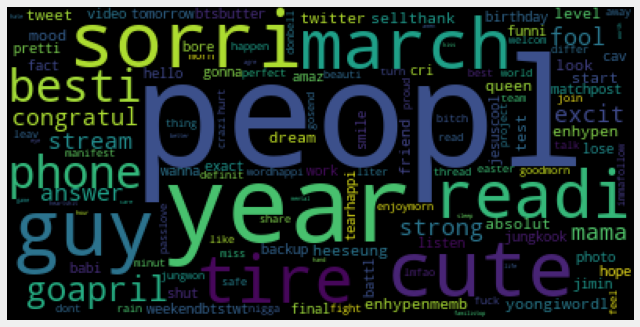

time: 506 ms (started: 2022-06-30 17:03:28 +00:00)


In [460]:
lda_tfidf_data = fetchSelectedWords(lda_model_tfidf)
displayWordCloud(lda_tfidf_data)

LDA Visualization

In [461]:
vectorizer = CountVectorizer(
analyzer='word',       
min_df=3,# minimum required occurences of a word 
stop_words='english',# remove stop words
lowercase=True,# convert all words to lowercase
token_pattern='[a-zA-Z0-9]{3,}',# num chars > 3
max_features=5000,# max number of unique words
                            )
data_matrix = vectorizer.fit_transform(df.text)
data_matrix

<49590x5000 sparse matrix of type '<class 'numpy.int64'>'
	with 218550 stored elements in Compressed Sparse Row format>

time: 1.07 s (started: 2022-06-30 17:03:28 +00:00)


In [462]:
lda_model_temp = LatentDirichletAllocation(
n_components=10, # Number of topics
learning_method='online',
random_state=20,       
n_jobs = -1  # Use all available CPUs
                                     )
lda_output = lda_model_temp.fit_transform(data_matrix)

time: 1min 28s (started: 2022-06-30 17:03:29 +00:00)


In [463]:
pyLDAvis.enable_notebook()
pyLDAvis.sklearn.prepare(lda_model_temp, data_matrix, vectorizer, mds='tsne')

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)
/usr/local/lib/python3.7/dist-packages/pyLDAvis/_prepare.py:247: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  by='saliency', ascending=False).head(R).drop('saliency', 1)
/usr/local/lib/python3.7/dist-packages/sklearn/manifold/_t_sne.py:783: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/manifold/_t_sne.py:793: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/manifold/_t_sne.py:827: FutureWarning: 'square_distan

PreparedData(topic_coordinates=               x          y  topics  cluster       Freq
topic                                                  
7      32.420952   8.115230       1        1  11.829706
2       0.648955  71.707100       2        1  10.442346
1      71.019684   9.971006       3        1  10.394712
0       3.785981  33.185135       4        1  10.387027
3     -42.666500  -9.222070       5        1   9.889331
6      -3.621689 -43.526516       6        1   9.737609
8      -3.632402  -4.171708       7        1   9.675394
5     -36.584400  35.804413       8        1   9.468250
4      44.391380  50.615383       9        1   9.341303
9      40.235809 -31.591665      10        1   8.834321, topic_info=       Term         Freq        Total Category  logprob  loglift
2376   just  2740.000000  2740.000000  Default  30.0000  30.0000
1869   good  1812.000000  1812.000000  Default  29.0000  29.0000
2565   like  2782.000000  2782.000000  Default  28.0000  28.0000
2648   love  1474.000000  1474.000000  Default  27.0000  27.0000
2435   know  1317.000000  1317.000000  Default  26.0000  26.0000
...     ...          ...          ...      ...      ...      ...
3461  proud   138.511274   139.393207  Topic10  -4.9812   2.4202
3935  share   132.831518   133.713489  Topic10  -5.0231   2.4199
2774  means   122.355361   123.237344  Topic10  -5.1052   2.4193
3251   pick   120.133566   121.015507  Topic10  -5.1236   2.4192
2069   hold   116.946181   117.828143  Topic10  -5.1505   2.4190

[356 rows x 6 columns], token_table=      Topic      Freq      Term
term                           
8         9  0.995190      able
28       10  0.990929   account
51        3  0.998635  actually
102       1  0.996738       ago
103       2  0.993060     agree
...     ...       ...       ...
4964      9  0.997257      year
4966      1  0.998331     years
4970      3  0.998530       yes
4984      9  0.998858     youre
4987      1  0.996355   youtube

[338 rows x 3 columns], R=30, lambda_step=0.01, plot_opts={'xlab': 'PC1', 'ylab': 'PC2'}, topic_order=[8, 3, 2, 1, 4, 7, 9, 6, 5, 10])

time: 3.41 s (started: 2022-06-30 17:04:58 +00:00)


# Bar Diagram

In [464]:
def get_five_topics(model):
    x=model.show_topics(num_topics=5,formatted=False)
    topics_words = [(tp[0], [wd[0] for wd in tp[1]]) for tp in x]

    top_5 = []
    
    # print words only
    for topic,words in topics_words:
        top_5.append(" ".join(words))
    return top_5

def find_lda_score(model, top5Topics_lda):
    score_list=[]
    for topic in top5Topics_lda:
        bow_vector = dictionary.doc2bow(preprocess(topic))
        for index, score in sorted(model[bow_vector], key=lambda tup: -1*tup[1]):
            score = int(round(score,2)*100)
            #print(score)
            score_list.append(score)
            break
            #print("\nScore: {}\t \nTopic: {}".format(score, lda_model_tfidf.print_topic(index, 10)))
    return score_list


def top_five_bar_chart(labels, score, title):

    color = ['blue','orange','salmon','maroon','green']
    f = plt.figure(figsize =(10, 5) )

    ax = plt.subplot(111)

    count = 0
    index = [1,2,3,4,5]
    
    graph = ax.bar(index, score, label = labels, color = color, alpha=0.5)
    
    for p in graph:
        height = p.get_height()
        ax.text(x=p.get_x() + p.get_width() / 2, y=height+.10,
               s="{}%".format(height),
               ha='center', weight='bold', fontsize=16)
        

    ax=plt.gca()

    ax.set_xlabel("Topics", fontsize=15, labelpad=5, color='black')
    ax.set_ylabel("Topics Score", fontsize=14, labelpad=5, color='black')
    ax.spines['right'].set_color('none')
    ax.spines['top'].set_color('none')
    plt.title(title, fontsize=16)

    ax.legend(graph, labels, loc="center",
              frameon=False, bbox_to_anchor=(0.5, -0.3))

    
    plt.show()

time: 57.1 ms (started: 2022-06-30 17:05:02 +00:00)


https://blog.marketmuse.com/glossary/latent-dirichlet-allocation-definition/

In [465]:
id2word = corpora.Dictionary(processed_docs)

INFO:gensim.corpora.dictionary:adding document #0 to Dictionary(0 unique tokens: [])
INFO:gensim.corpora.dictionary:adding document #10000 to Dictionary(20995 unique tokens: ['ayron', 'awesom', 'close', 'kcbcnft', 'mint']...)
INFO:gensim.corpora.dictionary:adding document #20000 to Dictionary(36852 unique tokens: ['ayron', 'awesom', 'close', 'kcbcnft', 'mint']...)
INFO:gensim.corpora.dictionary:adding document #30000 to Dictionary(51573 unique tokens: ['ayron', 'awesom', 'close', 'kcbcnft', 'mint']...)
INFO:gensim.corpora.dictionary:adding document #40000 to Dictionary(65290 unique tokens: ['ayron', 'awesom', 'close', 'kcbcnft', 'mint']...)
INFO:gensim.corpora.dictionary:built Dictionary(77909 unique tokens: ['ayron', 'awesom', 'close', 'kcbcnft', 'mint']...) from 49590 documents (total 284335 corpus positions)


time: 751 ms (started: 2022-06-30 17:05:02 +00:00)


LDA With TF - IDF

In [466]:
top_five_topics_lda_tfidf = get_five_topics(lda_model_tfidf)
score = find_lda_score(lda_model_tfidf, top_five_topics_lda_tfidf)

time: 17 ms (started: 2022-06-30 17:05:02 +00:00)


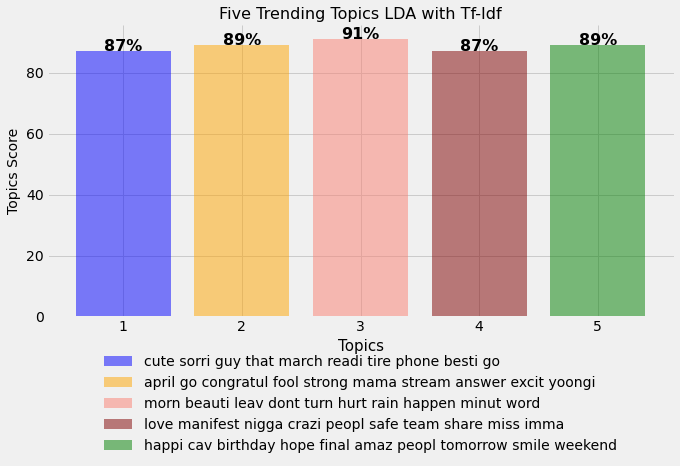

time: 271 ms (started: 2022-06-30 17:05:02 +00:00)


In [467]:
top_five_bar_chart(top_five_topics_lda_tfidf, score, 'Five Trending Topics LDA with Tf-Idf')

In [468]:
df = df[['date']].copy()
df['date'].fillna(pd.NaT)
df['date'] = pd.to_datetime(df['date'], errors='coerce')
timeseason = '1min'
dftime = df['date'].dt.round(timeseason)
newdf = dftime.value_counts()
df = pd.DataFrame(newdf)
df.head()

,date
2022-04-22,2491
2022-04-27,2491
2022-04-26,2491
2022-04-16,2491
2022-04-17,2490


time: 37.7 ms (started: 2022-06-30 17:05:03 +00:00)


In [469]:
df.index.name = 'ds'
df = df.rename(columns = {'date':'y'})
nameoffile = str(timeseason+'.csv')
df.to_csv(nameoffile)
df

,y
ds,
2022-04-22 00:00:00,2491
2022-04-27 00:00:00,2491
2022-04-26 00:00:00,2491
2022-04-16 00:00:00,2491
2022-04-17 00:00:00,2490
2022-04-29 00:00:00,2489
2022-04-14 00:00:00,2489
2022-04-11 00:00:00,2488
2022-03-30 00:00:00,2488


time: 19.2 ms (started: 2022-06-30 17:05:03 +00:00)


In [470]:
import numpy as np
import pandas as pd
from fbprophet import Prophet
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error, mean_absolute_error
plt.style.use('fivethirtyeight')

time: 4.89 ms (started: 2022-06-30 17:05:03 +00:00)


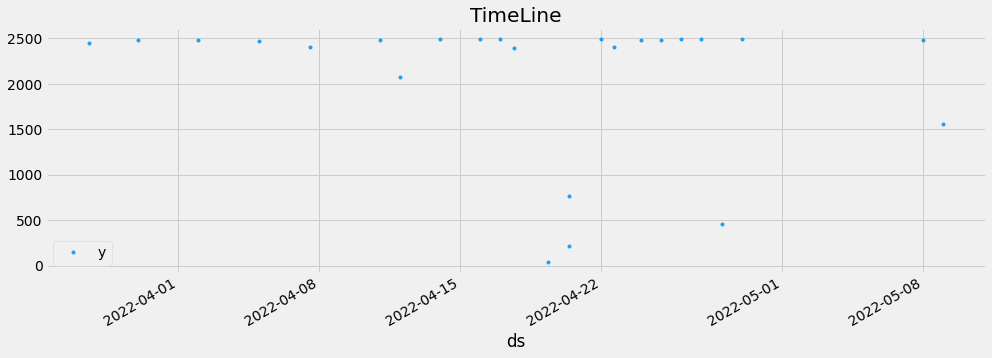

time: 222 ms (started: 2022-06-30 17:05:03 +00:00)


In [471]:
data = pd.read_csv('1min.csv',index_col=[0], parse_dates=[0])
data.plot(style='.', figsize=(15,5), color=["#1DA1F2"], title='TimeLine')
plt.show()

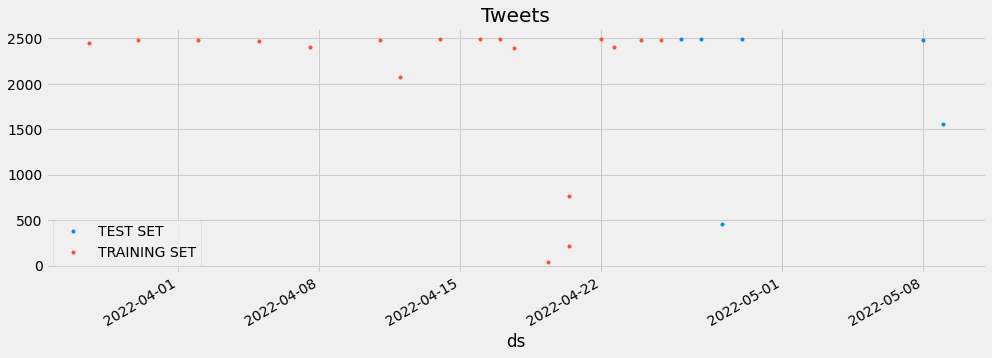

time: 226 ms (started: 2022-06-30 17:05:03 +00:00)


In [472]:
#Spliting Data
split_date = '25-apr-2022'
data_train = data.loc[data.index <= split_date].copy()
data_test = data.loc[data.index > split_date].copy()
#Plot train and test so you can see where we have split the data
data_test.rename(columns={'y': 'TEST SET'}).join(data_train.rename(columns={'y': 'TRAINING SET'}),how='outer').plot(figsize=(15,5), title='Tweets', style='.')
plt.show()

In [473]:
data_train

,y
ds,
2022-04-22 00:00:00,2491
2022-04-16 00:00:00,2491
2022-04-17 00:00:00,2490
2022-04-14 00:00:00,2489
2022-04-11 00:00:00,2488
2022-03-30 00:00:00,2488
2022-04-25 00:00:00,2484
2022-04-24 00:00:00,2482
2022-04-02 00:00:00,2478


time: 16.3 ms (started: 2022-06-30 17:05:03 +00:00)


In [474]:
data_test

,y
ds,
2022-04-27,2491
2022-04-26,2491
2022-04-29,2489
2022-05-08,2487
2022-05-09,1565
2022-04-28,459


time: 17.8 ms (started: 2022-06-30 17:05:03 +00:00)


In [475]:
# from sklearn.cluster import KMeans 
# model = KMeans(n_clusters=10, random_state=0)
# model.fit(data_train)
# # Predict on the training set with model
# data_test_fcst = model.predict(data_test)
# data_test_fcst

time: 1.52 ms (started: 2022-06-30 17:05:03 +00:00)


In [476]:
import statsmodels.api as sm
mod = sm.tsa.statespace.SARIMAX(df,
                                order=(1, 1, 1),
                                seasonal_order=(1, 1, 1, 5),
                                enforce_stationarity=False,
                                enforce_invertibility=False)


time: 10.7 ms (started: 2022-06-30 17:05:03 +00:00)


/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:219: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)


In [477]:
results = mod.fit()

/usr/local/lib/python3.7/dist-packages/scipy/optimize/lbfgsb.py:339: DeprecationWarning: tostring() is deprecated. Use tobytes() instead.
  task_str = task.tostring()
/usr/local/lib/python3.7/dist-packages/scipy/optimize/lbfgsb.py:339: DeprecationWarning: tostring() is deprecated. Use tobytes() instead.
  task_str = task.tostring()
/usr/local/lib/python3.7/dist-packages/scipy/optimize/lbfgsb.py:339: DeprecationWarning: tostring() is deprecated. Use tobytes() instead.
  task_str = task.tostring()
/usr/local/lib/python3.7/dist-packages/scipy/optimize/lbfgsb.py:339: DeprecationWarning: tostring() is deprecated. Use tobytes() instead.
  task_str = task.tostring()
/usr/local/lib/python3.7/dist-packages/scipy/optimize/lbfgsb.py:339: DeprecationWarning: tostring() is deprecated. Use tobytes() instead.
  task_str = task.tostring()
/usr/local/lib/python3.7/dist-packages/scipy/optimize/lbfgsb.py:339: DeprecationWarning: tostring() is deprecated. Use tobytes() instead.
  task_str = task.tostring(

time: 260 ms (started: 2022-06-30 17:05:03 +00:00)


/usr/local/lib/python3.7/dist-packages/scipy/optimize/lbfgsb.py:339: DeprecationWarning: tostring() is deprecated. Use tobytes() instead.
  task_str = task.tostring()
/usr/local/lib/python3.7/dist-packages/scipy/optimize/lbfgsb.py:339: DeprecationWarning: tostring() is deprecated. Use tobytes() instead.
  task_str = task.tostring()
/usr/local/lib/python3.7/dist-packages/scipy/optimize/lbfgsb.py:339: DeprecationWarning: tostring() is deprecated. Use tobytes() instead.
  task_str = task.tostring()
/usr/local/lib/python3.7/dist-packages/scipy/optimize/lbfgsb.py:339: DeprecationWarning: tostring() is deprecated. Use tobytes() instead.
  task_str = task.tostring()
/usr/local/lib/python3.7/dist-packages/scipy/optimize/lbfgsb.py:339: DeprecationWarning: tostring() is deprecated. Use tobytes() instead.
  task_str = task.tostring()
/usr/local/lib/python3.7/dist-packages/scipy/optimize/lbfgsb.py:339: DeprecationWarning: tostring() is deprecated. Use tobytes() instead.
  task_str = task.tostring(

In [481]:
pred = results.get_prediction(start=pd.to_datetime('2022-05-08'), dynamic=False)
pred_ci = pred.conf_int()

time: 7.27 ms (started: 2022-06-30 17:05:58 +00:00)


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: FutureWarning: Value based partial slicing on non-monotonic DatetimeIndexes with non-existing keys is deprecated and will raise a KeyError in a future Version.
  """Entry point for launching an IPython kernel.


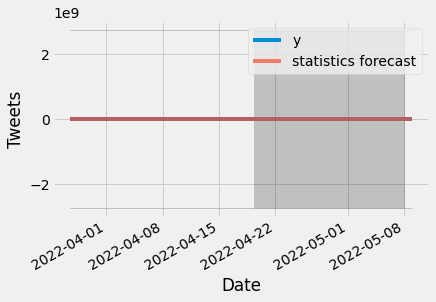

time: 206 ms (started: 2022-06-30 17:05:04 +00:00)


In [479]:
ax = df['2022':].plot(label='observed')
pred.predicted_mean.plot(ax=ax, label='statistics forecast', alpha=.7)

ax.fill_between(pred_ci.index,
                pred_ci.iloc[:, 0],
                pred_ci.iloc[:, 1], color='k', alpha=.2)

ax.set_xlabel('Date')
ax.set_ylabel('Tweets')
plt.legend()

plt.show()